## Plot Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,NaN,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0     CRIM    506 non-null    float64
 1        ZN   506 non-null    float64
 2     INDUS   506 non-null    float64
 3      CHAS   506 non-null    int64  
 4      NOX    506 non-null    float64
 5       RM    502 non-null    float64
 6      AGE    506 non-null    float64
 7       DIS   506 non-null    float64
 8      RAD    506 non-null    int64  
 9       TAX   506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11     BK     506 non-null    float64
 12     LSTAT  506 non-null    float64
 13     MEDV   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.columns = housing.columns.str.strip()

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284984,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703395,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
import matplotlib as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'BK'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

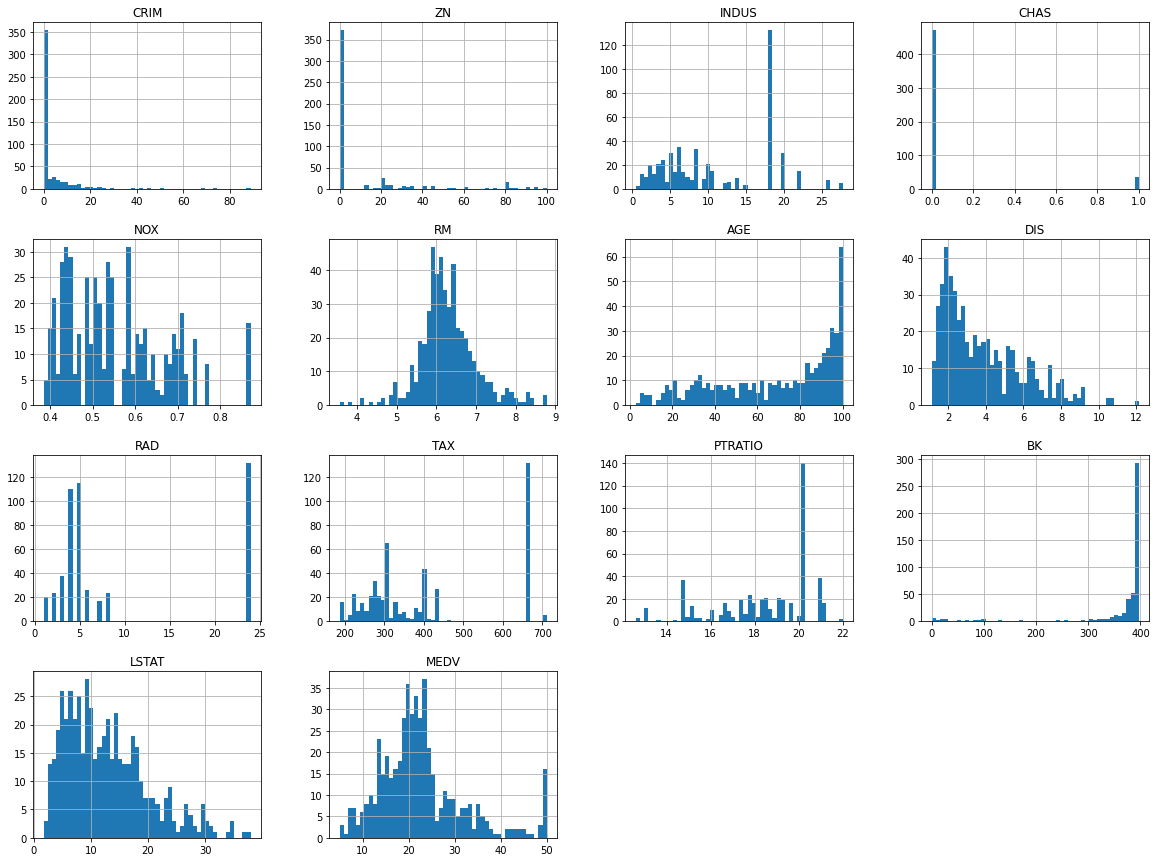

In [10]:
housing.hist(bins=50,figsize=(20,15))

## TRAIN - TEST SPLITTING 

In [11]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]


In [12]:
train_set,test_set= split_train_test(housing,0.2)

In [13]:
print(len(train_set))

405


In [14]:
print(len(test_set))

101


In [15]:
380+126

506

In [16]:
#Second method to split and train using sklearn

In [17]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

print(len(train_set))
print(len(test_set))

404
102


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [19]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [20]:
housing=strat_train_set.copy()

## looking for correlations

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>]], dtype=object)

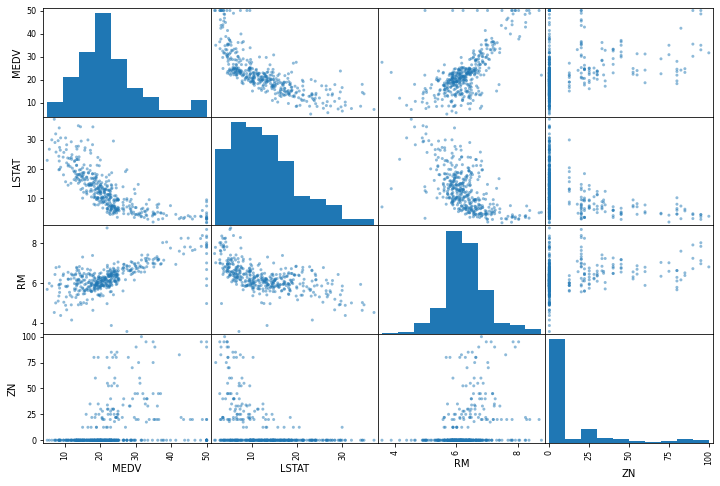

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","LSTAT","RM","ZN"]
scatter_matrix(housing[attributes],figsize=(12,8))


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

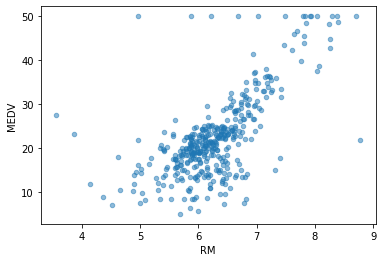

In [22]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.5)

## Trying out Attributes Contribution

In [23]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [25]:
matrix= housing.corr()
matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678598
BK         0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.523631
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

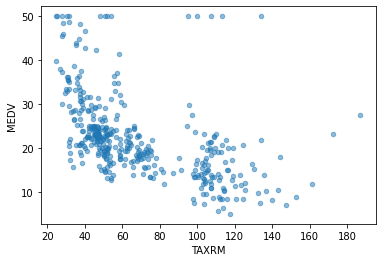

In [26]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.5)

In [27]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Creating A PipeLine  & Missing Attributes


In [28]:
median = housing["RM"].median()
housing["RM"].fillna(median)


254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [29]:
housing.shape

(404, 13)

In [30]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,402.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277744,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.713323,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imputer= SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
X=imputer.transform(housing)

In [35]:
housing_tr = pd.DataFrame(X,columns=housing.columns)

In [36]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277403,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711567,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [37]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

my_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [38]:
housing_num_tr= my_pipeline.fit_transform(housing)

In [39]:
housing_num_tr.shape

(404, 13)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model = LinearRegression()
model.fit(housing_num_tr,housing_labels)

LinearRegression()

In [41]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [42]:
prepared_data = my_pipeline.transform(some_data)

In [43]:
model.predict(prepared_data)

array([23.97295254, 27.21434949, 20.55050796, 25.07770307, 23.79459566])

In [44]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [45]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)

In [46]:
mse

23.421777070024305

In [47]:
rmse

4.839605053103435

In [48]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([4.19467408, 4.26763478, 5.10188394, 3.83029133, 5.35273763,
       4.39116148, 7.46391108, 5.56548759, 4.14944724, 6.06046932])

In [51]:
def print_scores(scores):
        print("Scores:", scores)
        print("Mean:", scores.mean())
        print("Standard deviation:",scores.std())
      

Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46

Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.194674

Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394

Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394

 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard d

Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46391108 5.56548759 4.14944724 6.06046932]
Mean: 5.037769847198557
Standard deviation: 1.0622155680642227
Scores: [4.19467408 4.26763478 5.10188394 3.83029133 5.35273763 4.39116148
 7.46

In [ ]:
from joblib import dump,load
dump(model , 'Predictor.joblib')